#### EDA (Исследовательский анализ данных)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dish = pd.read_csv("data/dish.csv")
ingredients = pd.read_csv("data/ingredients.csv")
dish.head()

,dish_id,total_calories,total_mass,ingredients,split
0,dish_1561662216,300.794281,193.0,ingr_0000000508;ingr_0000000122;ingr_000000002...,test
1,dish_1561662054,419.438782,292.0,ingr_0000000312;ingr_0000000026;ingr_000000002...,train
2,dish_1562008979,382.936646,290.0,ingr_0000000448;ingr_0000000520;ingr_000000046...,test
3,dish_1560455030,20.590000,103.0,ingr_0000000471;ingr_0000000031;ingr_0000000347,train
4,dish_1558372433,74.360001,143.0,ingr_0000000453,train


In [2]:
dish.info()
dish.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dish_id         3262 non-null   object 
 1   total_calories  3262 non-null   float64
 2   total_mass      3262 non-null   float64
 3   ingredients     3262 non-null   object 
 4   split           3262 non-null   object 
dtypes: float64(2), object(3)
memory usage: 127.6+ KB


,total_calories,total_mass
count,3262.000000,3262.000000
mean,255.012738,214.980074
std,219.637570,161.497428
min,0.000000,1.000000
25%,80.114996,92.000000
50%,209.110062,177.000000
75%,375.122963,305.000000
max,3943.325195,3051.000000


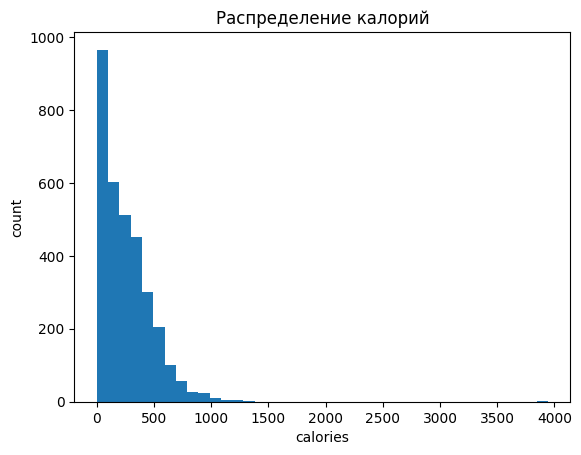

In [11]:
plt.hist(dish.total_calories, bins=40)
plt.xlabel("calories")
plt.ylabel("count")
plt.title("Распределение калорий")
plt.show()

Text(0.5, 1.0, 'Количество ингредиентов в блюдах')

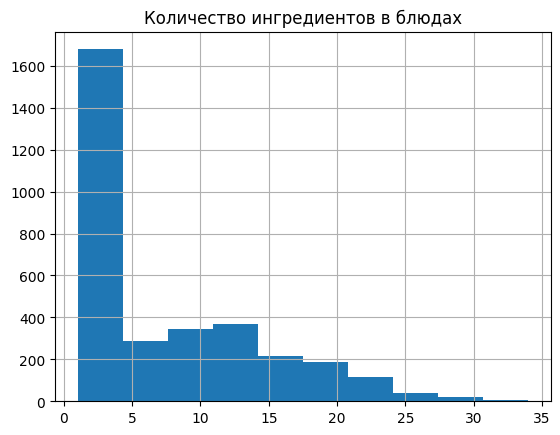

In [4]:
dish["ingredients_list"] = dish.ingredients.apply(lambda x: x.split(";"))
dish["num_ingr"] = dish.ingredients_list.apply(len)

dish.num_ingr.hist()
plt.title("Количество ингредиентов в блюдах")

In [5]:
from collections import Counter
cnt = Counter(i for lst in dish.ingredients_list for i in lst)
pd.DataFrame(cnt.most_common(20))

,0,1
0,ingr_0000000161,1561
1,ingr_0000000291,1379
2,ingr_0000000122,947
3,ingr_0000000312,723
4,ingr_0000000189,713
5,ingr_0000000094,686
6,ingr_0000000520,572
7,ingr_0000000515,506
8,ingr_0000000524,493
9,ingr_0000000471,481


In [6]:
import os
import glob
img_paths = glob.glob("data/images/*/rgb.png")
len(img_paths)

3490

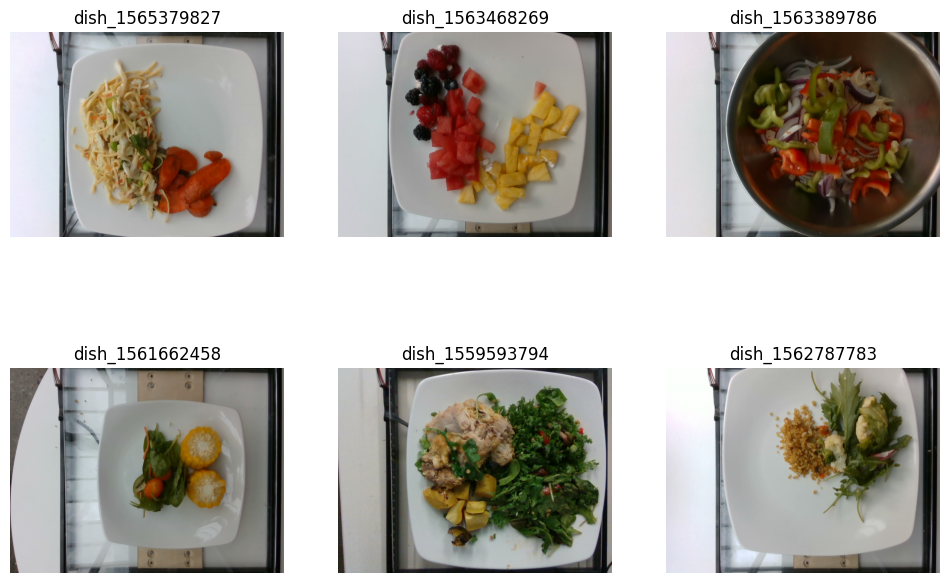

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for ax, path in zip(axs.flatten(), img_paths[:6]):
    ax.imshow(Image.open(path))
    ax.set_title(os.path.basename(os.path.dirname(path)))
    ax.axis("off")

Text(0.5, 1.0, 'Calories vs mass')

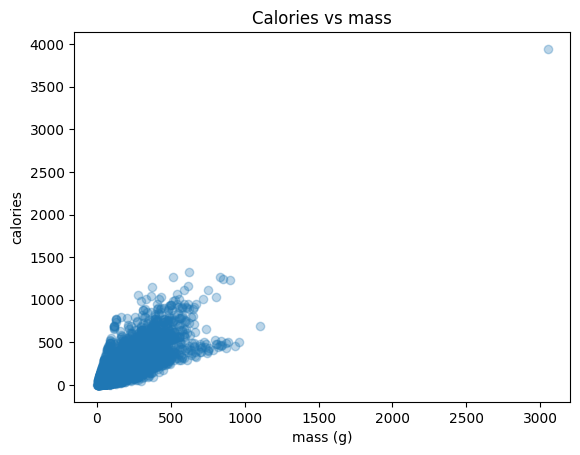

In [8]:
plt.scatter(dish.total_mass, dish.total_calories, alpha=0.3)
plt.xlabel("mass (g)")
plt.ylabel("calories")
plt.title("Calories vs mass")

In [9]:
dish.split.value_counts()

split
train    2755
test      507
Name: count, dtype: int64

#### Выводы EDA

**Структура и типы данных**
 - Нет пропусков в ключевых столбцах
 - Размер датасета достаточный для обучения мультимодели.

Выводы:
 - Данные чистые, дополнительных операций очистки не требуется.

<br>

**Распределение калорийности**

Гистограмма калорий (plt.hist(dish.total_calories, bins=40)) показывает:
- Большинство блюд находится в диапазоне 200–600 ккал.
- Имеется длинный правый хвост (до ~1500–2000 ккал).

Выводы:
- Калории распределены неравномерно, логарифм улучшит стабильность.
- MAE или HuberLoss могут работать стабильнее, чем MSE.

<br>

**Анализ ингредиентов**

Разбиение ингредиентов (ingredients_list = ingredients.split(";")) показывает:
- В блюде обычно 10–20 ингредиентов (видно из num_ingr.hist()).
- Среди ингредиентов присутствуют как часто встречающиеся, так и редкие.
- Словарь ингредиентов достаточно большой (проверка через Counter).

Выводы:
- Надо создать embedding для каждого ингредиента и усреднять их (Bag of Ingredients).
- BERT здесь не обязателен, т.к. текст не является естественным языком, а скорее структурированным списком.

<br>

**Изображения**

- Изображения разнообразные, различаются по цвету, композиции, освещению.
- Не все изображения идеально выровнены.

Выводы:
- Оптимальная модель — EfficientNet.
- Аугментации: RandomCrop, ColorJitter, Affine, CoarseDropout.

<br>

**Взаимосвязь массы и калорий**

На графике scatter(total_mass, total_calories):
- Масса связана с калориями, но не определяет их полностью.
- Тип блюда важнее массы.

Выводы:
- Массу нужно использовать как дополнительный числовой признак.
- Лучший вариант это небольшой MLP (Linear → ReLU → Linear).

<br>

**Проверка split**

- dish.split.value_counts() показывает нормальное распределение по train/val/test.

<br>

**Метрики**

Основные:
- MAE (mean absolute error) в калориях, легко интерпретировать
- RMSE
Дополнительно:
- MAE% (процентная ошибка)

##### Обучение модели

In [1]:
from scripts.config import Config
from scripts.utils import train

config = Config()
train(config)

/Users/alexeypokrovsky/Documents/Work/Learning/Development/Backend/Python/ai-calorie-dishes/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps
Vocab size (with PAD/UNK): 200
Epoch 1/20
[Train] loss=95646.5589, MAE=233.29, RMSE=309.27, R2=-0.9589
[Val]   loss=27423.7198, MAE=126.96, RMSE=165.60, R2=0.3900
Saved new best model to models/dish_calorie_model.pt
Epoch 2/20
[Train] loss=26185.4526, MAE=114.55, RMSE=161.82, R2=0.4637
[Val]   loss=18447.0427, MAE=101.87, RMSE=135.82, R2=0.5897
Saved new best model to models/dish_calorie_model.pt
Epoch 3/20
[Train] loss=9369.9701, MAE=62.86, RMSE=96.80, R2=0.8081
[Val]   loss=9778.9167, MAE=69.85, RMSE=98.89, R2=0.7825
Saved new best model to models/dish_calorie_model.pt
Epoch 4/20
[Train] loss=6858.4942, MAE=50.19, RMSE=82.82, R2=0.8595
[Val]   loss=8651.6061, MAE=61.78, RMSE=93.01, R2=0.8076
Saved new best model to models/dish_calorie_model.pt
Epoch 5/20
[Train] loss=5750.3089, MAE=45.76, RMSE=75.83, R2=0.8822
[Val]   loss=13940.2533, MAE=79.59, RMSE=118.07, R2=0.6899
Epoch 6/20
[Train] loss=5675.3195, MAE=43.81, RMSE=75.33, R2=0.8838
[Val]   loss=6691.1694, MAE=52.

#### Валидация качества

Device: mps
Loaded checkpoint from: models/dish_calorie_model.pt
Trained epoch: 13 val_loss: 5106.786096215484
[Test] MSE=5106.7862, MAE=48.44, RMSE=71.46, R2=0.8864


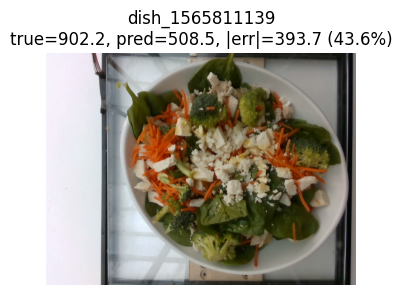

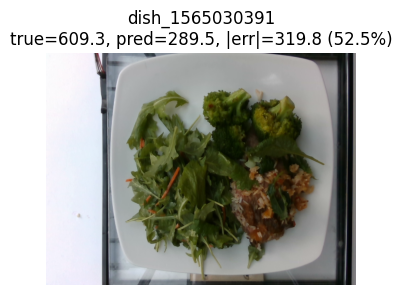

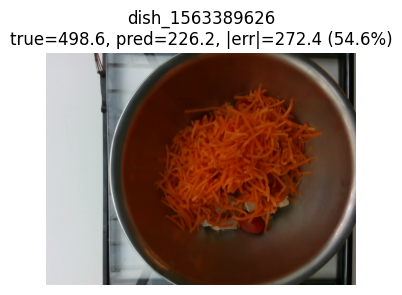

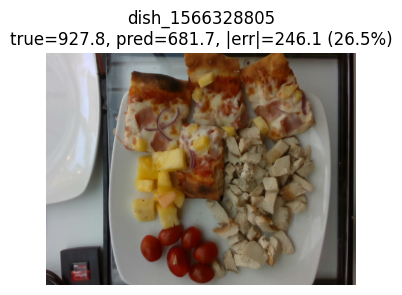

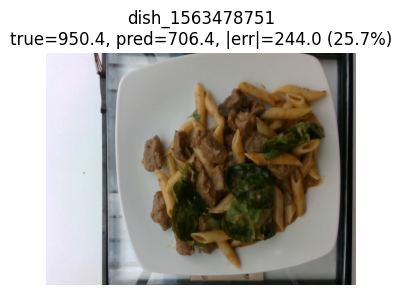

In [3]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from scripts.config import Config
from scripts.utils import set_seed, get_device
from scripts.inference import (
    load_trained_model,
    build_loader_for_split,
    evaluate_on_loader,
)

# Загрузка конфига, девайса и обученной модели
cfg = Config()
set_seed(cfg.SEED)
device = get_device(cfg)
print("Device:", device)

model, vocab, ckpt = load_trained_model(cfg, device)
print("Loaded checkpoint from:", cfg.CHECKPOINT_PATH)
print("Trained epoch:", ckpt.get("epoch"), "val_loss:", ckpt.get("val_loss"))

# DataLoader для test-сплита
test_ds, test_loader = build_loader_for_split(
    cfg,
    vocab=vocab,
    split="test",   # именно test
    ds_type="val",  # без аугментаций
)

len(test_ds)

# Инференс на test и финальные метрики
test_metrics, test_records = evaluate_on_loader(
    model=model,
    loader=test_loader,
    dataset=test_ds,
    device=device,
)

print(
    f"[Test] MSE={test_metrics['mse']:.4f}, "
    f"MAE={test_metrics['mae']:.2f}, "
    f"RMSE={test_metrics['rmse']:.2f}, "
    f"R2={test_metrics['r2']:.4f}"
)

# Топ-5 самых тяжёлых блюд
df_err = pd.DataFrame(test_records)
df_err["rel_err_pct"] = df_err["abs_err"] / df_err["true_cal"].clip(lower=1) * 100

top5 = df_err.sort_values("abs_err", ascending=False).head(5)
top5

for _, row in top5.iterrows():
    dish_id = row["dish_id"]
    img_path = cfg.IMAGE_ROOT / dish_id / "rgb.png"

    img = Image.open(img_path).convert("RGB")

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(
        f"{dish_id}\n"
        f"true={row['true_cal']:.1f}, "
        f"pred={row['pred_cal']:.1f}, "
        f"|err|={row['abs_err']:.1f} "
        f"({row['rel_err_pct']:.1f}%)"
    )
    plt.show()

#### Оценка качества модели

##### 1. Итоговые метрики на тестовом наборе

Модель была обучена на мультимодальных данных и протестирована на выделенном тестовом сплите. Модель показала высокое качество: средняя абсолютная ошибка менее 50 ккал, а коэффициент детерминации R² близок к 0.89, что говорит о хорошей обобщающей способности.

**Финальные результаты:**

| Метрика | Значение |
|--------|----------|
| MAE | 48.44 ккал |
| RMSE | 71.46 ккал |
| MSE | 5106.79 |
| R² | 0.8864 |

<br/>

##### 2. Топ-5 блюд с наибольшей ошибкой

**dish_1565811139**
- Истина: 902.2 ккал  
- Предсказано: 508.5 ккал  
- Ошибка: 393.7 ккал (43.6%)

Причины:
- блюдо визуально выглядит лёгким: много зелени;  
- скрытая калорийность из-за масла/заправки, которые не видны на фото;  
- объём блюда недооценивается по внешнему виду.

**dish_1565030391**
- Истина: 609.3 ккал  
- Предсказано: 289.5 ккал  
- Ошибка: 319.8 ккал (52.5%)

Причины:
- блюдо визуально выглядит лёгким: много зелени; 
- калорийная часть (мясо/крупа) визуально мала;  

**dish_1563389626**
- Истина: 498.6 ккал  
- Предсказано: 226.2 ккал  
- Ошибка: 272.4 ккал (54.6%)

Причины:
- сверху видна только тёртая морковь - низкокалорийный продукт;  
- основная плотность калорий скрыта внутри блюда, не видна модели;

**dish_1566328805**
- Истина: 927.8 ккал  
- Предсказано: 681.7 ккал  
- Ошибка: 246.1 ккал (26.5%)

Причины:
- блюдо состоит из нескольких калорийных элементов (пицца + мясо), но модель недооценила вклад пиццы;  
- редкая композиция в тренировочных данных.

**dish_1563478751**
- Истина: 950.4 ккал  
- Предсказано: 706.4 ккал  
- Ошибка: 244.0 ккал (25.7%)

Причины:
- скрытая калорийность из-за масла/заправки, которые не видны на фото;  
- зелень создаёт впечатление лёгкости блюда;

<br/>

##### 3. Общие причины ошибок модели

- скрытые калории (масло, соус, сыр) не видны визуально;  
- овощи визуально увеличивают объём, создавая ложное ощущение низкой калорийности;  
- редкие и сложные композиции на тарелке;
